In [5]:
%matplotlib inline

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
from sklearn.cluster import AgglomerativeClustering

Load data:

In [7]:
data = pd.read_csv('gender_set_normal.csv', header=0, sep=',')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9378 entries, 0 to 9377
Data columns (total 8 columns):
followers_count    9378 non-null float64
post_count         9378 non-null float64
like_count         9378 non-null float64
friends_count      9378 non-null float64
posts_count        9378 non-null float64
reposts_count      9378 non-null float64
videos_count       9378 non-null float64
photos_count       9378 non-null float64
dtypes: float64(8)
memory usage: 586.2 KB


In [8]:
data_array=np.array(data.values)

In [ ]:
#data.hist(bins=100, figsize=(20,15))

In [11]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_array) 

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [12]:
labels=cluster.labels_

In [13]:
data['gender']=labels

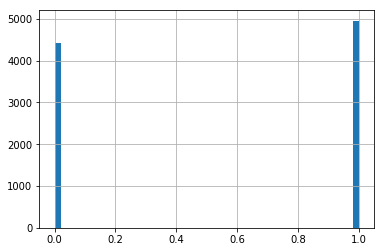

In [14]:
data['gender'].hist(bins=50)

In [15]:
print('0 = ', len(data.loc[data['gender'] == 0])/len(data)*100, '%')
print('1 = ', len(data.loc[data['gender'] == 1])/len(data)*100, '%')

0 =  47.195564086159095 %
1 =  52.804435913840905 %


In [ ]:
seaborn.pairplot(data,hue="gender", diag_kind="kde")

In [16]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
dist = 1 - cosine_similarity(data_array)

In [18]:
pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(9378, 2)

In [19]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

In [20]:
colors = {0: 'blue',
          1: 'red' }
names = {0: '0', 
         1: '1' }

In [21]:
df = pd.DataFrame({'x': x, 'y':y, 'gender':labels}) 
groups = df.groupby('gender')

c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
c

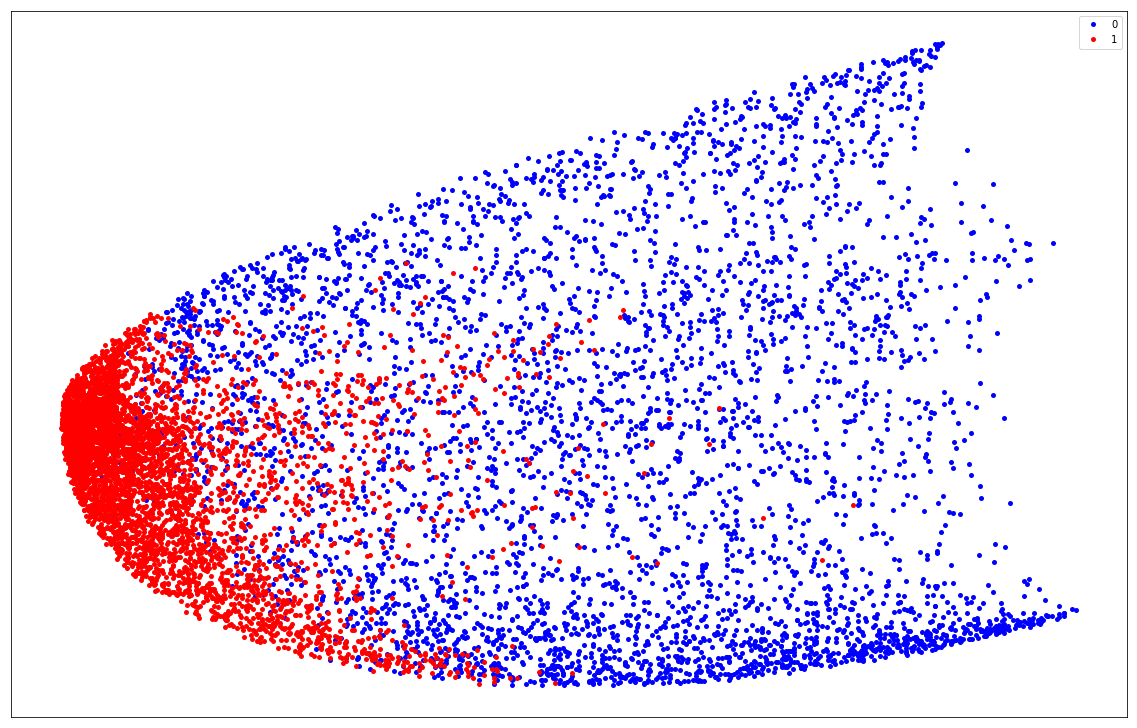

In [22]:
fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()

plt.show()

In [28]:
import sklearn.metrics

In [29]:
sil_coeff = sklearn.metrics.silhouette_score(data_array, labels, metric='euclidean')
dav_bould_score = sklearn.metrics.davies_bouldin_score(data_array, labels)
 

print('The Silhouette Coefficient is ',sil_coeff)
print('The Davies-Bouldin score is ',dav_bould_score)


The Silhouette Coefficient is  0.2702303533837674
The Davies-Bouldin score is  1.5984360279236864


c:\users\vladimir\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [ ]:
#import scipy.cluster.hierarchy as sch
#dendogram = sch.dendrogram(sch.linkage(data_array, method= 'ward', metric= 'euclidean'))